# Homework 4 (DL Friday, October 13 at 12:00)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## QUESTION: Implement the gradient descent algorithm to minimize $J(\mathbf{x}) = (1.1 - \sin(\mathbf{x}))^2$. Also, empirically test the effect of the step size on the convergence speed.

#### Gradient decent formulation (check page 12 of houndout 4):
\begin{equation}
    \hat{\mathbf{x}}^{(i+1)} = \hat{\mathbf{x}}^{(i)} - \gamma \frac{\partial J(\mathbf{x})}{\partial \mathbf{x}}|_{\mathbf{x} = \hat{\mathbf{x}}^{(i)}}
\end{equation}
#### where $J(\mathbf{x})$ is a cost function.

In [3]:
def J(x):
    return (1.1 - np.sin(x))**2

### Part a (1 point): For the gradient descent implementation, you need to compute the gradient of the cost function. In the section below, implement the code for the gradient of the cost function $J(\mathbf{x}).$

In [4]:
def gradient_of_J(x):
    """ Return the gradient of the cost function.
    """
    return 2 * (-np.cos(x))*(1.1-np.sin(x))
    raise NotImplementedError()

In [5]:
"""Check the result for several inputs"""
assert gradient_of_J(0.0) == -2.2
assert np.allclose(gradient_of_J(np.pi/2), 0.)
assert np.allclose(gradient_of_J(np.pi), 2.2)
assert np.allclose(gradient_of_J(3 * np.pi/2), 0.0)

## Part b (2 points): Implement the gradient descent algorithm.
#### In the (partially) provided code below, the aim is to compute the outcomes of the gradient descent algorithm when minimizing the cost function $\mathbf{J}$. The algorithm starts with a given initial value denoted as $x_0$. Our goal here is to obtain the results after running the algorithm for 5 iterations. Your task is to code the update rule for the gradient descent algorithm in the mentioned place.

In [13]:
def gradient_descent_algorithm(x0, step_size, number_of_iterations = 5):
    x_results = np.zeros((number_of_iterations + 1,)) # To set the first result as the initial value x0, we increase the count of x_results by one. 
    x_results[0] = x0
    for i in range(number_of_iterations):
        #Implement the gradient descent update rule here
        # HINT: you should calculate x_results[i+1] from x_results[i] 
        # and the code should call function gradient_of_J
        x_results[i+1] = x_results[i] - step_size * gradient_of_J(x_results[i])
        # raise NotImplementedError()
    return x_results

#### You can evaluate the correctness of your code by executing the following provided code with initial value $x_0 = 0$ and different step sizes $[1, 0.1, 0.01]$

In [14]:
"""Check the result for several inputs"""
assert np.allclose(gradient_descent_algorithm(0.0, 1, 5), np.array([0.0, 2.2, 1.8569, 1.7775, 1.7277, 1.6926]), rtol=1e-03, atol=1e-04)
assert np.allclose(gradient_descent_algorithm(0.0, 0.1, 5), np.array([0.0, 0.22, 0.3921, 0.5248, 0.6285, 0.7113]), rtol=1e-03, atol=1e-04)
assert np.allclose(gradient_descent_algorithm(0.0, 0.01, 5), np.array([0.0, 0.022, 0.04355, 0.0647, 0.08533, 0.1055]), rtol=1e-03, atol=1e-04)

####  In the code below, you will observe the effect of the step size when running the gradient descent algorithm for $5$ iterations.

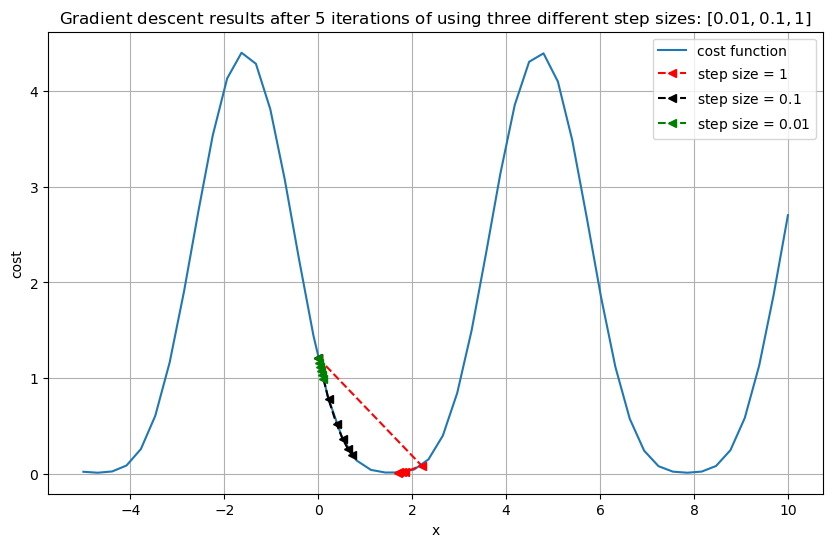

In [15]:
def plot_GD_stepsize(number_of_iteration):
    x = np.linspace(-5,10)
    x_results_1 = gradient_descent_algorithm(0.0, 1, number_of_iteration)
    x_results_2 = gradient_descent_algorithm(0.0, 0.1, number_of_iteration)
    x_results_3 = gradient_descent_algorithm(0.0, 0.01, number_of_iteration)

    mu = 0.1
    plt.figure(figsize=(10,6))
    plt.plot(x, J(x), label='cost function')
    plt.plot(x_results_1, J(x_results_1), 'r<--', label = 'step size = $1$')
    plt.plot(x_results_2, J(x_results_2), 'k<--', label = 'step size = $0.1$')
    plt.plot(x_results_3, J(x_results_3), 'g<--', label = 'step size = $0.01$')

    plt.title("Gradient descent results after {} iterations of using three different step sizes: $[0.01, 0.1, 1]$".format(number_of_iteration))
    plt.xlabel('x')
    plt.ylabel('cost')
    plt.legend()
    plt.grid()
    return True
plot_GD_stepsize(5);

#### Part c) (1 point): Your task here is to run the "plot_GD_stepsize" function for several numbers of iterations, specifically $[10, 20, 50]$, and observe the results. (You do not need to code anything here; just run the code below and observe the effect of the step size on the convergence rate.)

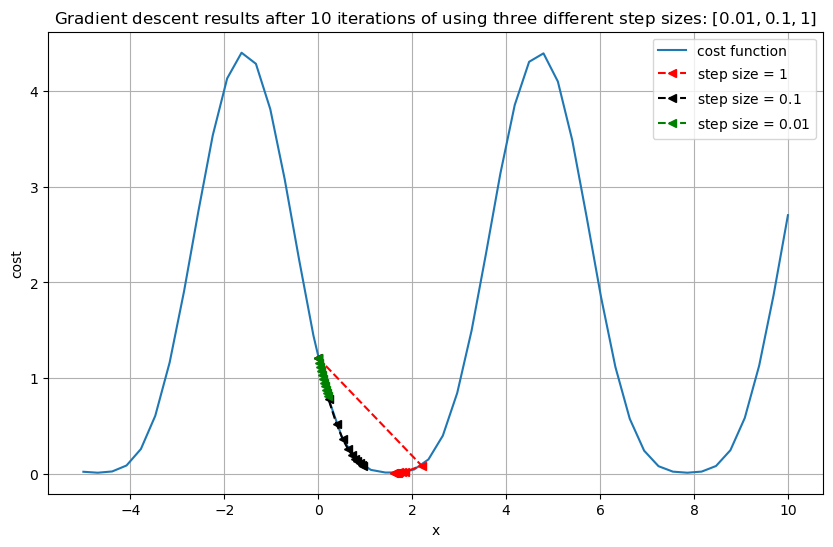

In [16]:
plot_GD_stepsize(10);


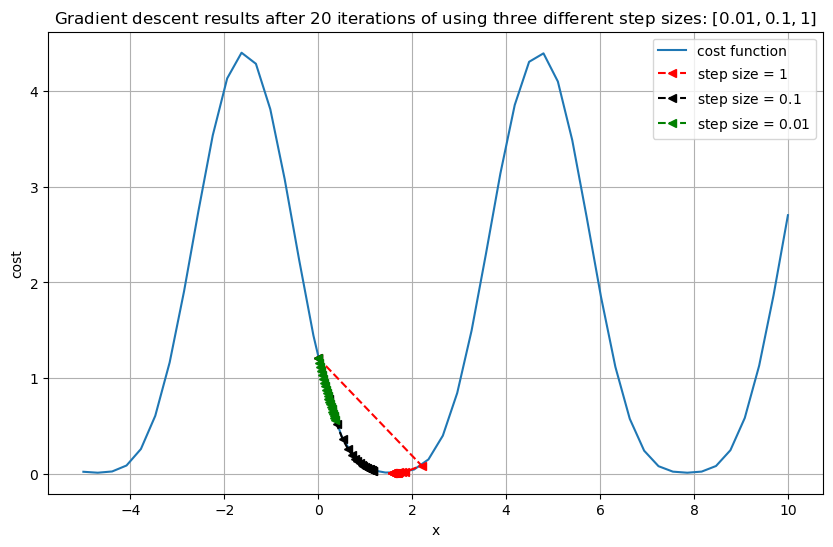

In [17]:
plot_GD_stepsize(20);


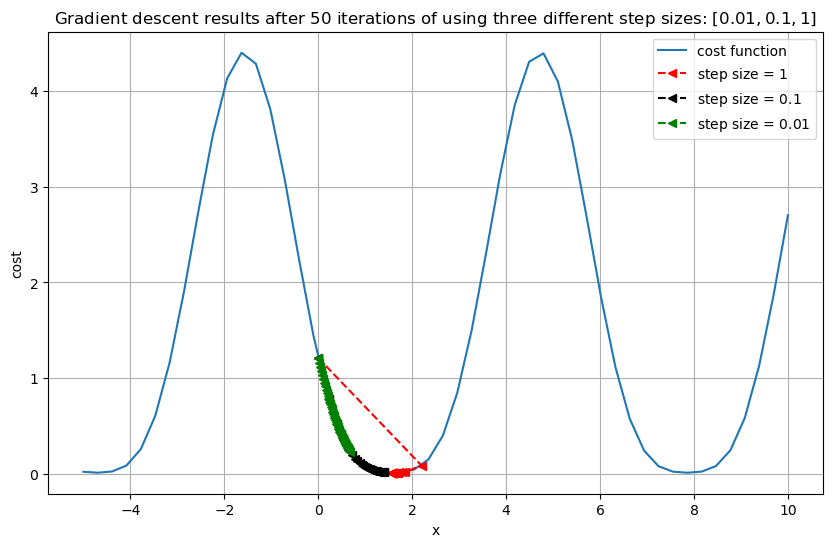

In [18]:
plot_GD_stepsize(50);